# Lab 8: Regression
For lab 8, you are going to analyze a data set called mtcars. The data set comes from a
1974 issue of Motor Trend US magazine and contains fuel consumption and 10 aspects of
automobile design and performance for 32 automobiles from 1973-1974. 


> Learning Objective
> - You will perform an exploratory data analysis (EDA) and then build a linear regression model. In particular, you will try to identify variables that will be good predictors of the fuel economy (mpg) of the car.


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind, kruskal, spearmanr, chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

## Load the data


The data set has 32 observations (rows) and 12 variables. We will only use the following columns:
- mpg – miles per gallon
- cyl – numbers of cylinders
- disp – displacement (cu. in.)
- hp – gross horsepower
- drat – rear axle ratio
- wt – weight (in 1000s of lbs)
- qsec – 1/4 mile time
- vs – Engine Shape (0 = V-shaped, 1 = straight)
- am – transmission (0 = automatic, 1 = manual)
- gear – number of forward gears
- carb – number of carburetors

In [2]:
data = pd.read_csv('mtcars.csv')
data = data.drop('Unnamed: 0', axis=1)

### Describe

In [3]:
# Describe the original data and transformed data using head(), info(), and describe()
def print_data(data):
    print(data.head())
    print(data.info())
    print(data.describe())

print_data(data)

boolean = ['vs', 'am']
ratio = ['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']
integer = ['cyl', 'gear', 'carb']
data[boolean] = data[boolean].astype('bool')
data[ratio] = data[ratio].astype('float')
data[integer] = data[integer].astype('int')

print_data(data)

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(

### Standardize

In [4]:
#  Standardize your features
scaler = StandardScaler()
data[ratio] = scaler.fit_transform(data[ratio])
data[integer] = scaler.fit_transform(data[integer])

print_data(data)

        mpg       cyl      disp        hp      drat        wt      qsec  \
0  0.153299 -0.106668 -0.579750 -0.543655  0.576594 -0.620167 -0.789601   
1  0.153299 -0.106668 -0.579750 -0.543655  0.576594 -0.355382 -0.471202   
2  0.456737 -1.244457 -1.006026 -0.795570  0.481584 -0.931678  0.432823   
3  0.220730 -0.106668  0.223615 -0.543655 -0.981576 -0.002336  0.904736   
4 -0.234427  1.031121  1.059772  0.419550 -0.848562  0.231297 -0.471202   

      vs     am      gear      carb  
0  False   True  0.430331  0.746967  
1  False   True  0.430331  0.746967  
2   True   True  0.430331 -1.140108  
3   True  False -0.946729 -1.140108  
4  False  False -0.946729 -0.511083  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     float64
 2   disp    32 non-null     float64
 3   hp      32 non-null     floa

### Characterize the dependent variable

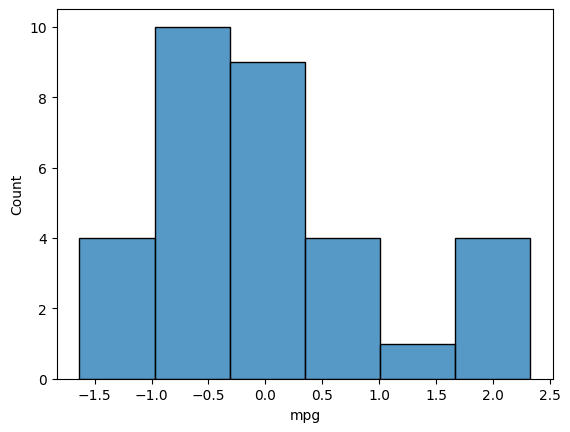

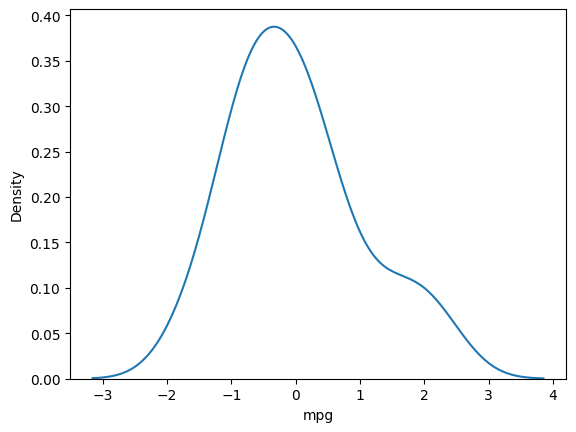

C:\Users\goetschm\AppData\Local\Temp\ipykernel_49972\2105827074.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['mpg'])


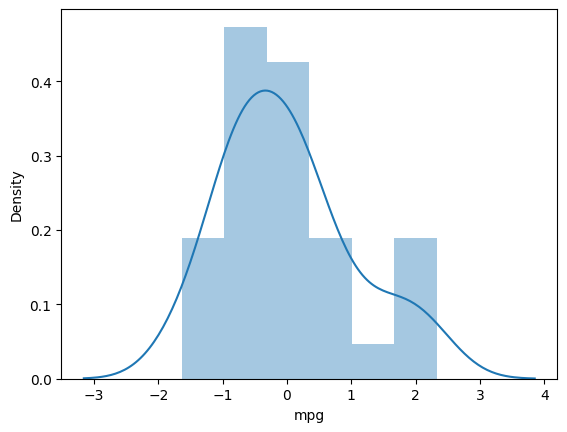

count    3.200000e+01
mean    -4.996004e-16
std      1.016001e+00
min     -1.633610e+00
25%     -7.865141e-01
50%     -1.501383e-01
75%      4.567366e-01
max      2.327934e+00
Name: mpg, dtype: float64


In [5]:
# Characterize the dependent variable
# plot the distribution over mpg and describe the range of values
sns.histplot(data['mpg'])
plt.show()

sns.kdeplot(data['mpg'])
plt.show()

sns.distplot(data['mpg'])
plt.show()

data['mpg'].describe()

print(data['mpg'].describe())

### Lab Report Questions
(a) Do you need to standardize your dependent/target/response variable? Would you
expect the results to change if you did?
- You should not standardize the dependent variable. The results will not be of equal
importance if you standardize the dependent variable, as the dependent variable is
the variable you are trying to predict. If you standardize the dependent variable, the
results will be in terms of standard deviations, which will not be meaningful.



## Conduct Exploratory Data Analysis


### Explore relationships between variables

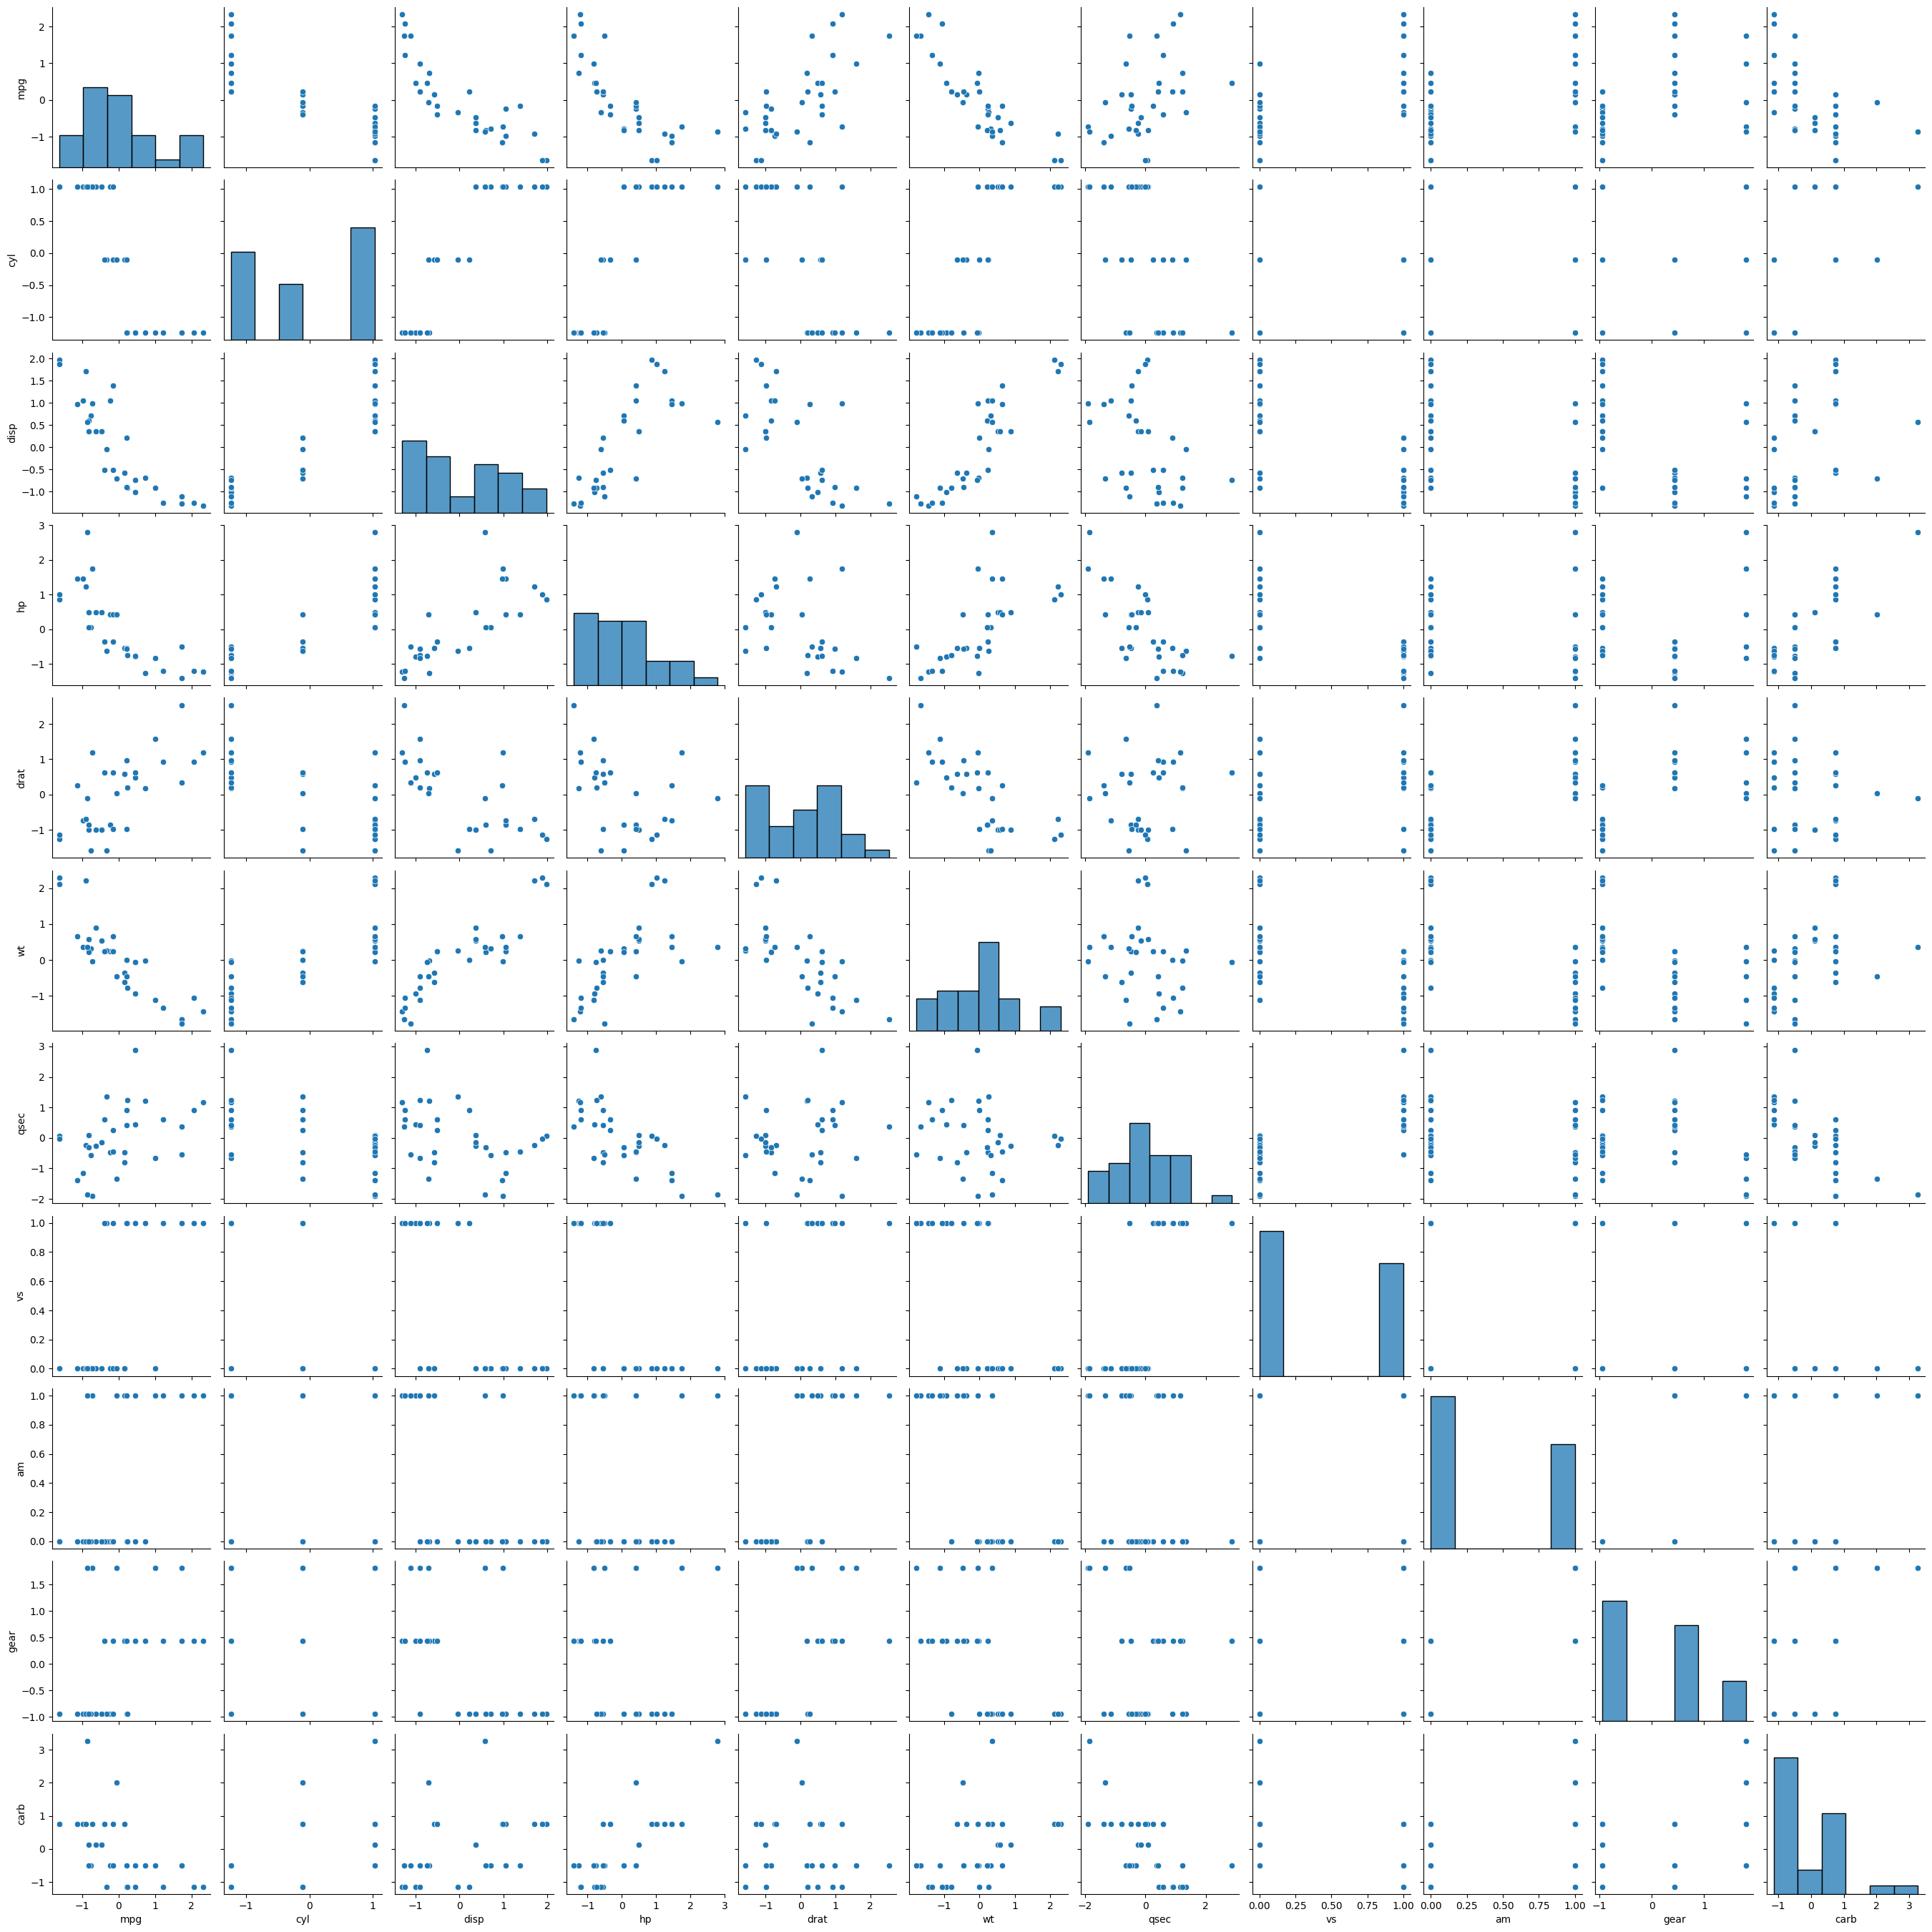

C:\Users\goetschm\AppData\Local\Temp\ipykernel_49972\3011293427.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=15)
C:\Users\goetschm\AppData\Local\Temp\ipykernel_49972\3011293427.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=15)
C:\Users\goetschm\AppData\Local\Temp\ipykernel_49972\3011293427.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(), rotation=15)


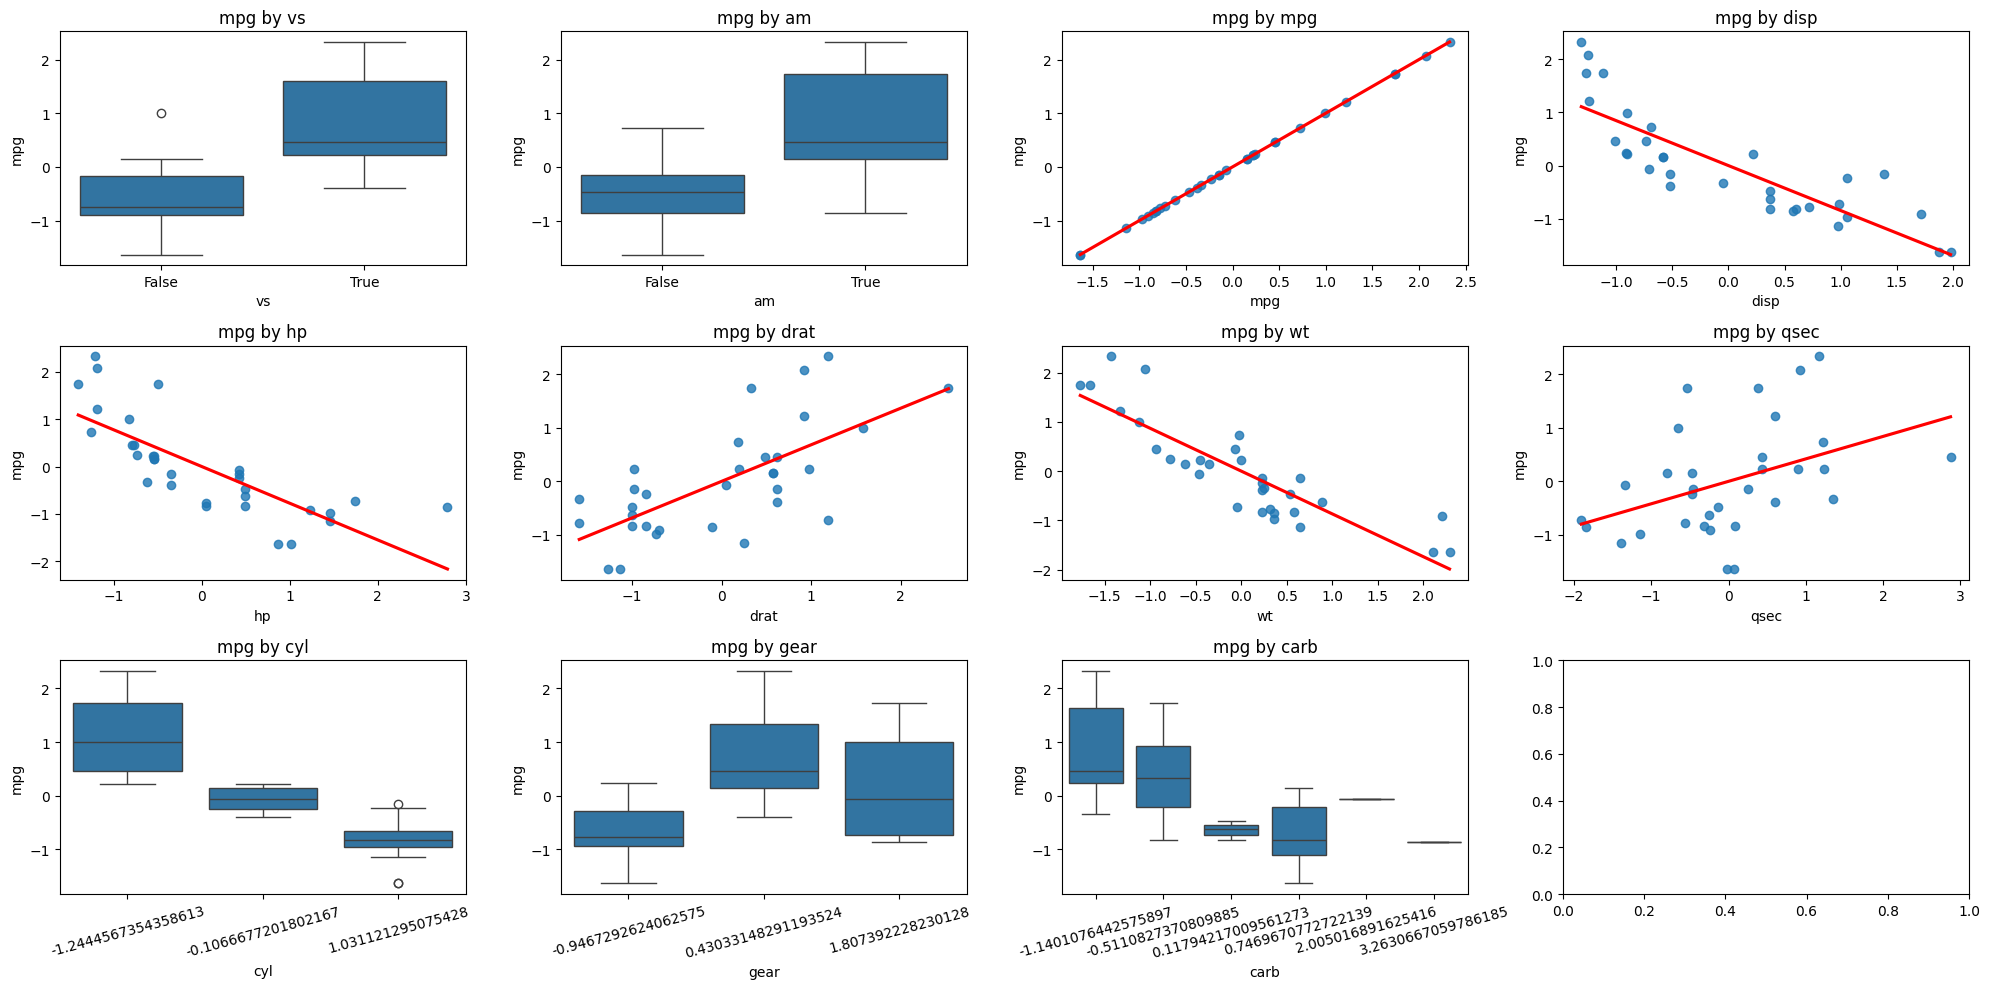

In [6]:
# Explore the relationships between each variable and mpg
# choose the appropriate plots based on the variable types
# (e.g., categorical, numerical, ordered)

# sns.clustermap(data.corr())
# pairplot is too large to display
sns.pairplot(data)
plt.show()


# plot all to see the relationships
fig, axs = plt.subplots(3, 4, figsize=(20, 10))

cols = boolean + ratio + integer

for i, col in enumerate(cols):
    if col in boolean:
        sns.boxplot(x=col, y='mpg', data=data, ax=axs[i//4, i%4])
    elif col in integer:
        fig = sns.boxplot(x=col, y='mpg', data=data, ax=axs[i//4, i%4])
        fig.set_xticklabels(fig.get_xticklabels(), rotation=15)
    elif col in ratio:
        sns.regplot(x=col, y='mpg', data=data, scatter=True,
                ci=None, line_kws={'color': 'red'}, ax=axs[i//4, i%4])
    axs[i//4, i%4].set_title('mpg by ' + col)

plt.tight_layout()
plt.show()

### Hypothesis Testing

In [7]:
# Use hypothesis testing to assess which variables show
# statistically significant association with the response – use α = 0.005).

results_h = pd.DataFrame(columns=['p-value'])
results_h.index.name = 'Variable'

# Categorical
for col in boolean:
    p = chi2_contingency(pd.crosstab(data[col], data['mpg']))[1]
    results_h.loc[col] = p

# Ordered
for col in integer:
    p = kruskal(*[group['mpg'] for name, group in data.groupby(col)])[1]
    results_h.loc[col] = p

# Numerical
for col in ratio:
    if col == 'mpg':
        continue
    p = spearmanr(data[col], data['mpg'])[1]
    results_h.loc[col] = p

results_h['sig'] = results_h['p-value'] < 0.005
results_h.sort_values('p-value', inplace=True)
results_h

,p-value,sig
Variable,,
disp,6.370336e-13,True
hp,5.085969e-12,True
wt,1.487595e-11,True
cyl,2.566217e-06,True
drat,5.381347e-05,True
gear,7.757547e-04,True
carb,7.013126e-03,False
qsec,7.055765e-03,False
vs,1.858062e-01,False


### Lab Report Questions
(a) Explain why we used a threshold of 0.005.
- Because of the Bonferroni correction, we used a threshold of 0.005. The Bonferroni
correction is a method used to counteract the problem of multiple comparisons. It
states that if you are testing multiple hypotheses, you should use a lower p-value
threshold to determine statistical significance. In this case, we are testing multiple
hypotheses, so we used a threshold of 0.005.


## Create some linear regression models

Use LinearRegression from sklearn.linear_model to create your regression models. To
do this you will need to instantiate the model, fit the model with the .fit() method,
and then generate predicted values with the .predict() method. Make sure you include
an intercept in all models. Do not make a test-training split of any kind. Make all
model comparisons using adjusted R2


In [8]:
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

### Model 1: Baseline Model
Model 1 should be a baseline or null model using only an intercept (no other features)


Model data: [0.] -4.996003610813204e-16
[0.]


c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


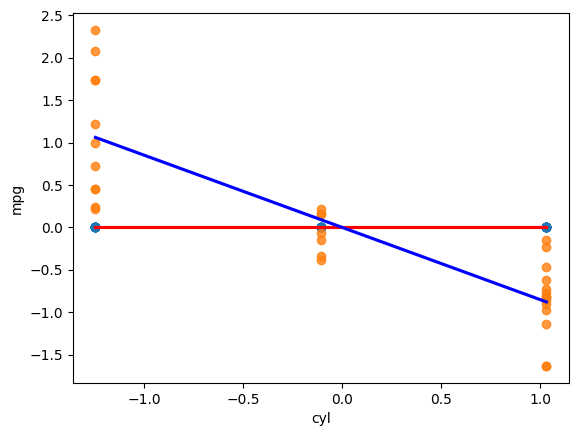

c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


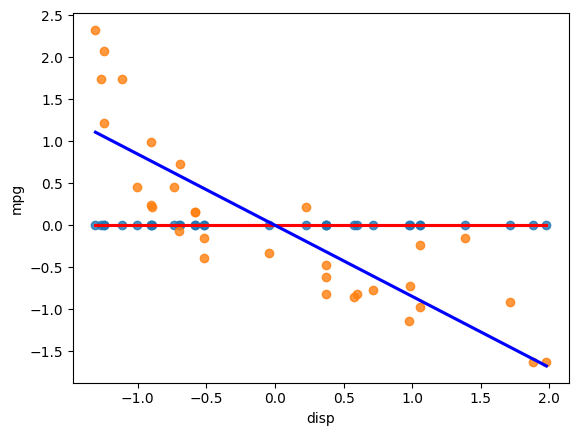

c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


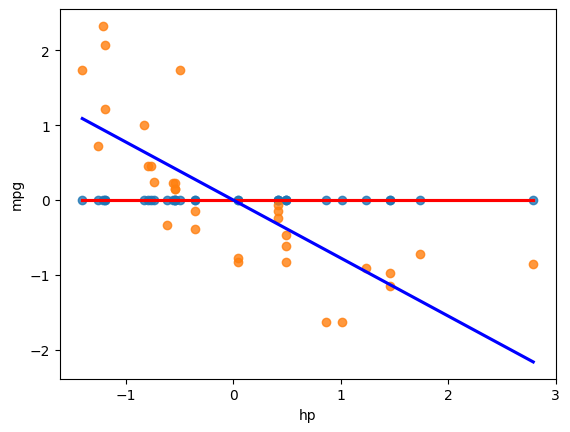

c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


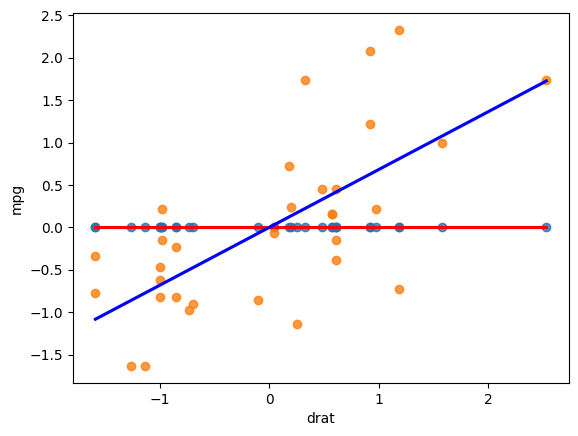

c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


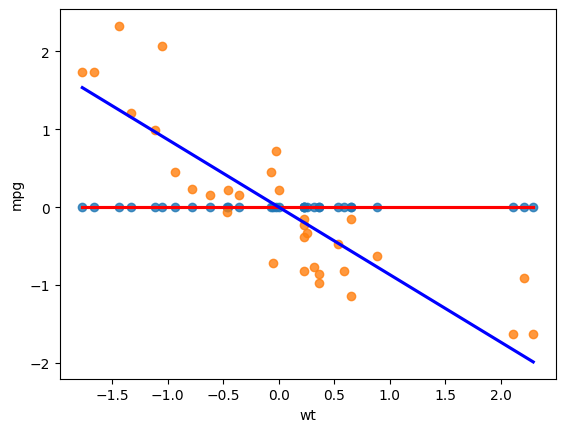

c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


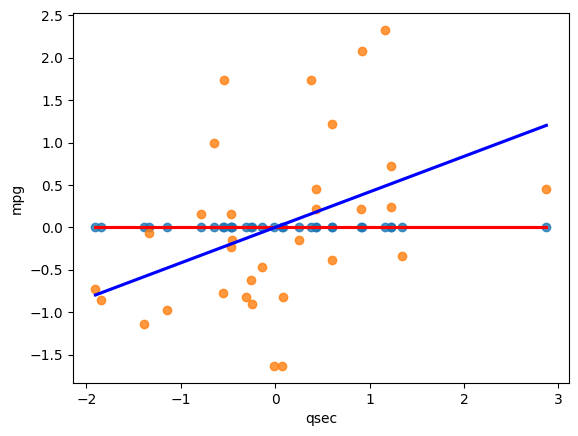

c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


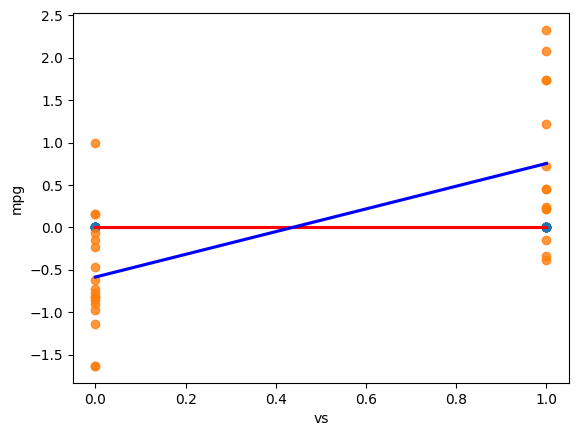

c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


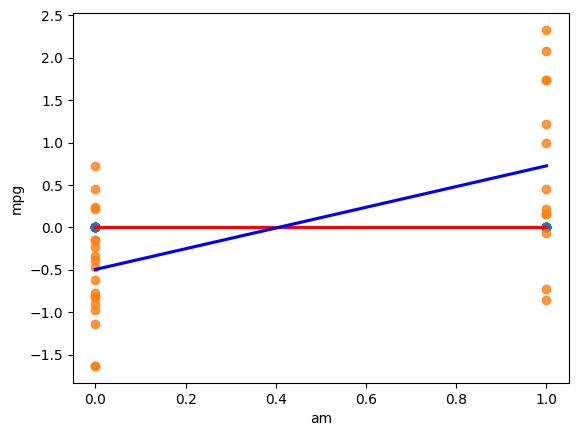

c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


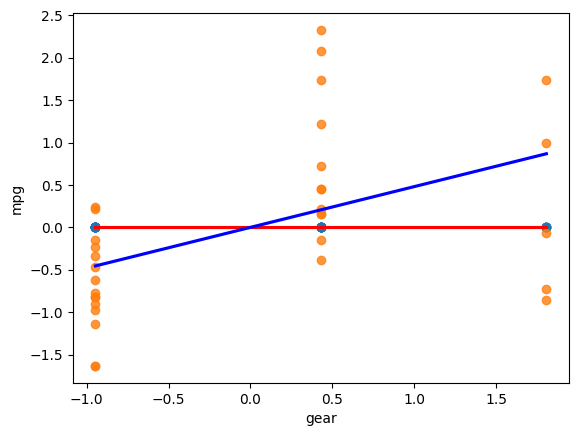

c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


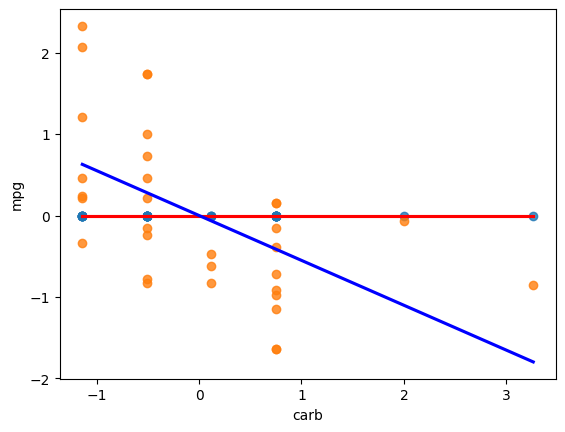

,R2,adj_R2
cyl,0.0,-0.033333
disp,0.0,-0.033333
hp,0.0,-0.033333
drat,0.0,-0.033333
wt,0.0,-0.033333
qsec,0.0,-0.033333
vs,0.0,-0.033333
am,0.0,-0.033333
gear,0.0,-0.033333
carb,0.0,-0.033333


In [9]:
results_linreg_base = pd.DataFrame(columns=['R2', 'adj_R2'])
model1 = LinearRegression()

data['mean_mpg'] = data['mpg'].mean()
model1.fit(data['mean_mpg'].values.reshape(-1, 1), data['mpg'])
model1.intercept_ = data['mpg'].mean()
data.drop('mean_mpg', axis=1, inplace=True)

print("Model data:", model1.coef_, model1.intercept_)

print(model1.coef_)
for col in data.columns:
    if col == 'mpg':
        continue
    pred = model1.predict(data[[col]])
    sns.regplot(y=pred, x=data[col], scatter=True, ci=None, line_kws={'color': 'red'})
    sns.regplot(y=data['mpg'], x=data[col], scatter=True, ci=None, line_kws={'color': 'blue'})
    plt.show()
    results_linreg_base.loc[col] = r2_score(data['mpg'], pred)
    results_linreg_base.loc[col, 'adj_R2'] = adjusted_r2(results_linreg_base.loc[col, 'R2'], data.shape[0], 1)
results_linreg_base

### Model 2: Predictive Variables
Model 2 should be a model using the variables you identified as predictive in your
exploratory data analysis from section 2.

In [10]:
results_linreg_pred = pd.DataFrame(columns=['R2'])
results_linreg_pred.index.name = 'Variable'
model2 = LinearRegression()

sig_list = [ col for col in results_h[results_h['sig']].index if col != 'mpg']
model2.fit(data[sig_list], data['mpg'])
results_linreg_pred.loc['predictive'] = r2_score(data['mpg'], model2.predict(data[sig_list]))
results_linreg_pred.loc['predictive', 'adj_R2'] = adjusted_r2(results_linreg_pred.loc['predictive', 'R2'], data.shape[0], len(sig_list))

results_linreg_pred

,R2,adj_R2
Variable,,
predictive,0.852417,0.816997


### Model 3: Greedy Feature Selection
Model 3 should be a model built using greedy feature selection

In [11]:

# (a) Build a model for each variable individually.
results_linreg_greedy = pd.DataFrame(columns=['R2'])
results_linreg_greedy.index.name = 'Variable'
model3 = LinearRegression()

for col in data.columns:
    if col == 'mpg':
        continue
    model3.fit(data[[col]], data['mpg'])
    score = r2_score(data['mpg'], model3.predict(data[[col]]))
    results_linreg_greedy.loc[col] = score
    results_linreg_greedy.loc[col, 'adj_R2'] = adjusted_r2(score, data.shape[0], 1)


# (b) Sort the variables using adjusted R2.
results_linreg_greedy.sort_values('R2', ascending=False, inplace=True)

results_linreg_greedy

,R2,adj_R2
Variable,,
wt,0.752833,0.744594
cyl,0.726180,0.717053
disp,0.718343,0.708955
hp,0.602437,0.589185
drat,0.463995,0.446128
vs,0.440948,0.422313
am,0.359799,0.338459
carb,0.303518,0.280302
gear,0.230673,0.205029


In [12]:
# (c) Starting with the baseline model, add each variable one at a time to the model.
# If variable improves the adjusted R2 over the last model, keep that variable in
# the model. If the variable does not improve the adjusted R2, do not keep that
# variable. At the end, you should have a single model with multiple variables.
old_baselines = []
cols = results_linreg_greedy.index
best_set = []

for col in cols:
    initial = results_linreg_greedy.loc[col, 'R2']
    results_linreg_greedy.loc[col, 'set_R2'] = initial
    baseline = [col]
    old_baselines.append(set(baseline))
    for col2 in cols:
        new_baseline = baseline + [col2]
        if set(new_baseline) in old_baselines:
            continue
        old_baselines.append(set(new_baseline))
        model3.fit(data[new_baseline], data['mpg'])
        score = r2_score(data['mpg'], model3.predict(data[new_baseline]))
        adj_score = adjusted_r2(score, data.shape[0], len(new_baseline))
        if adj_score > results_linreg_greedy.loc[col, 'set_R2']:
            results_linreg_greedy.loc[col, 'set_R2'] = adj_score
            results_linreg_greedy.loc[col, 'Greedy Set'] = str(new_baseline)
            baseline = new_baseline
        if adj_score > results_linreg_greedy['R2'].max():
            best_set = new_baseline

results_linreg_greedy.sort_values('set_R2', ascending=False, inplace=True)
top_greedy = results_linreg_greedy['set_R2'].idxmax()
print(f"Best greedy set: {results_linreg_greedy.loc[top_greedy, 'Greedy Set']}")
print(f"Score: {results_linreg_greedy['set_R2'].iloc[0]}")
results_linreg_greedy

Best greedy set: ['am', 'wt', 'cyl', 'carb', 'qsec']
Score: 0.8319158149315521


,R2,adj_R2,set_R2,Greedy Set
Variable,,,,
am,0.359799,0.338459,0.831916,"['am', 'wt', 'cyl', 'carb', 'qsec']"
hp,0.602437,0.589185,0.831139,"['hp', 'wt', 'drat', 'am', 'carb', 'qsec']"
qsec,0.175296,0.147806,0.828922,"['qsec', 'wt', 'cyl', 'am']"
disp,0.718343,0.708955,0.828571,"['disp', 'wt', 'hp', 'drat', 'vs', 'am', 'qsec']"
wt,0.752833,0.744594,0.828312,"['wt', 'cyl', 'hp', 'am', 'carb', 'qsec']"
carb,0.303518,0.280302,0.825579,"['carb', 'wt', 'cyl']"
drat,0.463995,0.446128,0.823761,"['drat', 'wt', 'cyl', 'carb']"
gear,0.230673,0.205029,0.822160,"['gear', 'wt', 'cyl', 'hp', 'carb']"
vs,0.440948,0.422313,0.819202,"['vs', 'wt', 'cyl', 'carb']"


### --
5. Compute and compare the Root Mean-Squared Error (RMSE) for these three models.


In [13]:
# RSME for models
RSME = pd.DataFrame(columns=['RSME'])
RSME.index.name = 'Model'

RSME.loc['Model 1'] = root_mean_squared_error(data['mpg'], model1.predict(data[['vs']]))
RSME.loc['Model 2'] = root_mean_squared_error(data['mpg'], model2.predict(data[sig_list]))
RSME.loc['Model 3'] = root_mean_squared_error(data['mpg'], model3.predict(data[best_set]))

RSME


c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,RSME
Model,
Model 1,1.000000
Model 2,0.384166
Model 3,0.385079


6. For the best performant model, make a scatter plot between the model’s predicted mpg
and the real mpg.


c:\Users\goetschm\Documents\CSC2621\env\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


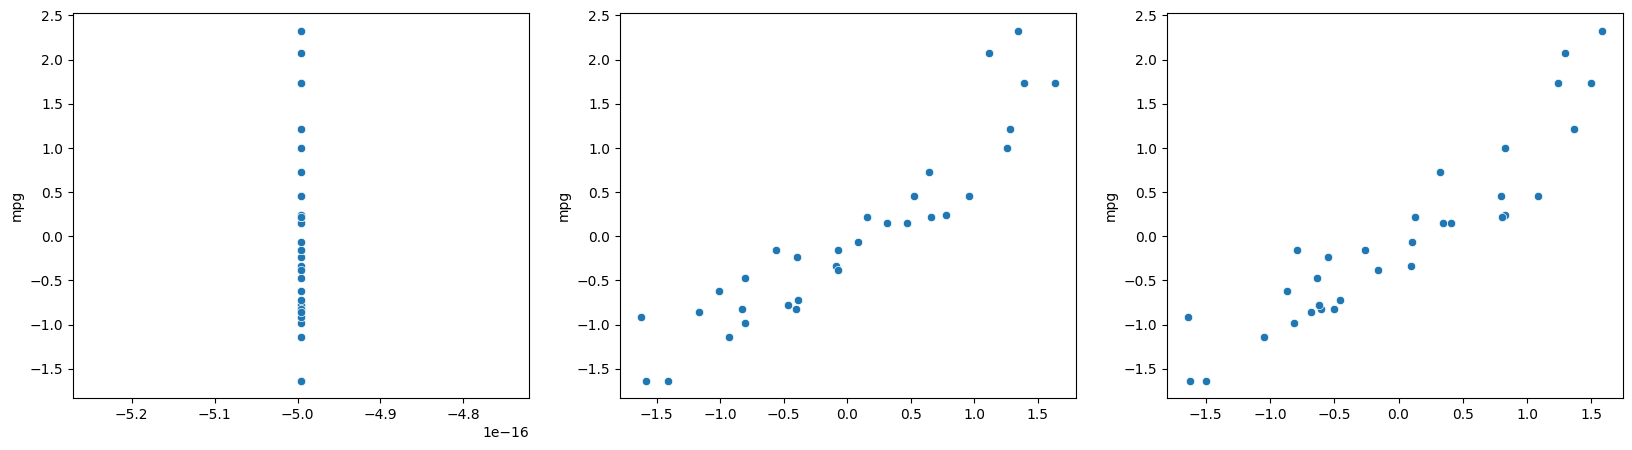

Text(0.5, 1.0, 'Predicted vs Actual mpg for Model 2')

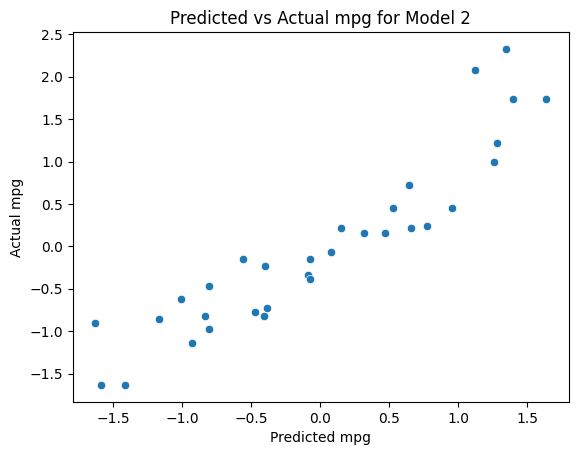

In [14]:
pred1 = model1.predict(data[['wt']])
pred2 = model2.predict(data[sig_list])
pred3 = model3.predict(data[best_set])

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(x=pred1, y=data['mpg'], ax=axs[0])
sns.scatterplot(x=pred2, y=data['mpg'], ax=axs[1])
sns.scatterplot(x=pred3, y=data['mpg'], ax=axs[2])
plt.show()

# plot best performing plot
sns.scatterplot(x=pred2, y=data['mpg'])
plt.xlabel('Predicted mpg')
plt.ylabel('Actual mpg')
plt.title('Predicted vs Actual mpg for Model 2')

7. For the best performant model, plot the residuals.


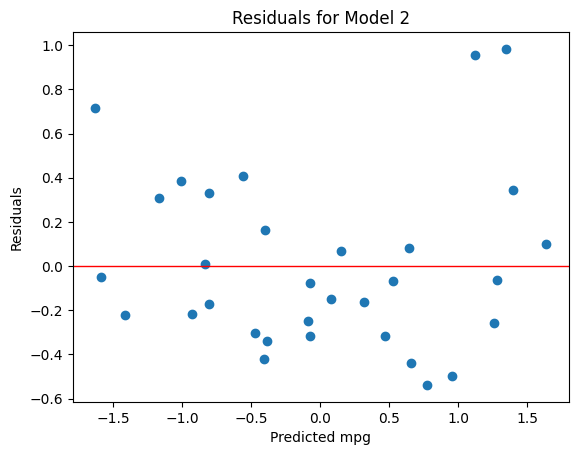

C:\Users\goetschm\AppData\Local\Temp\ipykernel_49972\2534996849.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='mpg', ylabel='Density'>

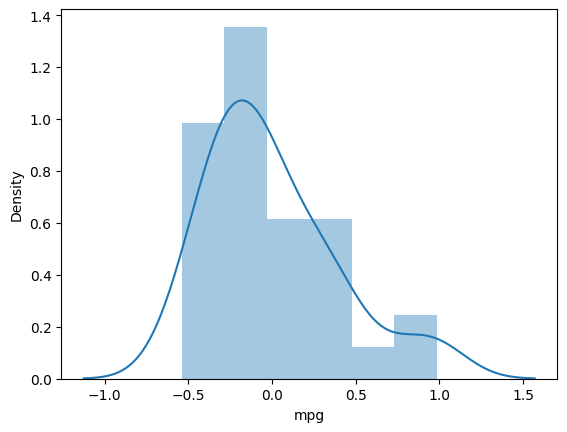

In [15]:
# plot residuals
residuals = data['mpg'] - pred2
plt.gca().axhline(0, color='red', linewidth=1)
plt.scatter(pred2, residuals)
plt.xlabel('Predicted mpg')
plt.ylabel('Residuals')
plt.title('Residuals for Model 2')
plt.show()

sns.distplot(residuals)


(a) Which model has the lowest RMSE? Which model has the highest RMSE? How
do you interpret this value?
- Model 2 has the lowest RMSE, and Model 1 has the highest RMSE. The RMSE is a measure of how well the model fits the data. The lower the RMSE, the better the model fits the data. The higher the RMSE, the worse the model fits the data. In this case, Model 2 fits the data the best, and Model 1 fits the data the worst.

(b) Include and Interpret the two plots you made. Does this model meet the assump-
tions associated with a BLUE model?
- The scatter plot shows the relationship between the predicted mpg and the real mpg. The residuals plot shows the residuals of the model. The residuals plot shows that the residuals are normally distributed, which is a good sign that the model meets the assumptions associated with a BLUE model.

(c) Which approach (exploratory analysis or greedy) produced the best model?
- The exploratory analysis produced the best model. The exploratory analysis identified the variables that were the best predictors of the fuel economy of the car, which resulted in the best model. The approach results were very similar, but the exploratory analysis produced the best model.


## Assess feature predictiveness with bootstrapping
1. When you run a linear regression the impact of each feature on the dependent variable is summarized by the coefficient associated with that variable, learned by the model. In this section we will use bootstrapping to assess the empirical probability that each feature increases mpg consumption by looking at the variation of the coefficient learned by regression for each feature.



2. To do this:

(a) Draw 32 samples from the rows of the dataset with replacement – this will be
your bootstrap data set.


In [16]:
# draw 32 samples with replacement for bootstrapping
def bootstrap(data, n):
    return data.sample(n, replace=True)

n = 32
bootstrap_data = bootstrap(data, n)

(b) Instantiate a new linear regression model object. Make sure to include a constant.

In [17]:
# Instantiate a new linear regression model object. Make sure to include a constant.
model4 = LinearRegression()
model4.intercept_ = model3.intercept_


(c) Use the .fit() method to fit the linear regression to the bootstrap dataset with
mpg as the target/response/dependent variable and all remaining variables as
predictors.


In [18]:
remaining = bootstrap_data.columns.drop('mpg')
model4.fit(bootstrap_data[remaining], bootstrap_data['mpg'])

LinearRegression()


(d) Use the .feature names in and .coef methods to pull out the coefficient for each
variable. Record each coefficient.


In [19]:
feature_names = model4.feature_names_in_
feature_values = model4.coef_

print("Model data:", feature_names, feature_values)

Model data: ['cyl' 'disp' 'hp' 'drat' 'wt' 'qsec' 'vs' 'am' 'gear' 'carb'] [ 0.13947571  0.60268364 -0.60885063 -0.09959637 -1.00895544  0.27110271
  0.09849386  0.51524884  0.12242718  0.18941464]



(e) Repeat steps 1–4 1000 times. At the end you will have a list of 1000 coefficient
estimates for each variable. Each one of these numbers is a measurement of how
much impact this variable has on mpg.


In [20]:
estimates = pd.DataFrame(columns=feature_names)
intercept = 0

for i in range(1000):
    bootstrap_data = bootstrap(data, n)
    model4 = LinearRegression()
    model4.intercept_ = intercept
    model4.fit(bootstrap_data[remaining], bootstrap_data['mpg'])
    estimates.loc[i] = model4.coef_




3. Use this data to make a table that shows the empirical probability that each variable
increases mpg consumption.


In [21]:
estimates.describe()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.085466,0.280279,-0.154213,0.170771,-0.601455,0.376952,-0.062249,0.407551,0.181037,-0.161669
std,0.571081,0.409991,0.364575,0.238694,0.437611,0.393927,0.621965,0.565192,0.339407,0.372446
min,-3.315920,-1.106610,-2.242503,-0.605103,-2.301751,-0.581026,-3.432249,-2.409865,-1.797909,-2.893698
25%,-0.213900,0.024518,-0.358386,0.024567,-0.848715,0.114035,-0.301566,0.109188,-0.008507,-0.337515
50%,0.062259,0.236851,-0.160793,0.143074,-0.579759,0.295283,0.017304,0.397388,0.149635,-0.123069
75%,0.354036,0.498571,0.038767,0.291606,-0.329769,0.574609,0.245724,0.709822,0.360934,0.058123
max,3.126054,3.457558,1.392399,1.760699,1.523238,1.798238,6.732289,4.674779,2.404917,2.145381


<Axes: xlabel='None', ylabel='None'>

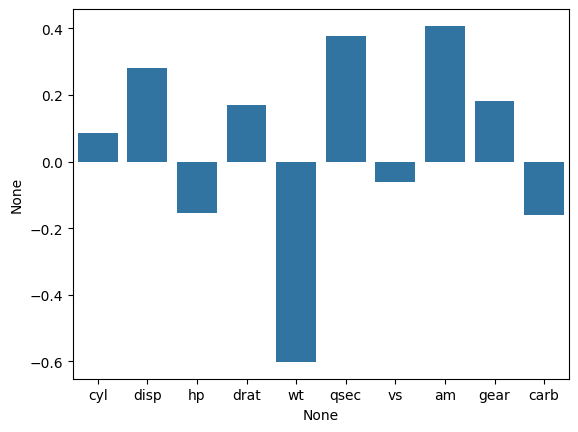

In [22]:
est_means = estimates.mean()
sns.barplot(x=est_means.index, y=est_means)

In [23]:
prob = (estimates > 0).mean()
prob = prob.sort_values(ascending=False)
prob = prob.reset_index()
prob.columns = ['Variable', 'Probability']
prob

,Variable,Probability
0,qsec,0.874
1,am,0.830
2,drat,0.793
3,disp,0.781
4,gear,0.740
5,cyl,0.560
6,vs,0.522
7,carb,0.306
8,hp,0.286
9,wt,0.067


(a) For each variable what percentage of the time was the learned coefficient greater
than 0 across the bootstrap iterations? Include a table of this information.
- The empirical probability that each variable increases mpg consumption is as follows:


(b) Which variables would you say were the most predictive? Can you give explana-
tions for why you think these variables were the most predictive based on your
exploratory analysis?
- The most predictive variables are hp, wt, and qsec. These variables were the most predictive based on the exploratory analysis because they had the strongest relationships with the dependent variable, mpg.